# Phase 3 Data Science Report

## Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [8]:
# read in all the batches
batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [9]:
# convert the batches to dataframes
df1 = pd.DataFrame(batch1[b'data'])
df2 = pd.DataFrame(batch2[b'data'])
df3 = pd.DataFrame(batch3[b'data'])
df4 = pd.DataFrame(batch4[b'data'])
df5 = pd.DataFrame(batch5[b'data'])
test_df = pd.DataFrame(test_batch[b'data'])

In [10]:
# print the shape of each dataframe
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(test_df.shape)

(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [11]:
# combine the dataframes into one
df_combined = pd.concat([df1, df2, df3, df4, df5])

In [12]:
# reshape df_combined to 32x32x3
df_combined = df_combined.values.reshape(-1, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [13]:
# combine all the labels into one
labels = np.concatenate([batch1[b'labels'], batch2[b'labels'], batch3[b'labels'], batch4[b'labels'], batch5[b'labels']])


In [14]:
# make a new dataframe with the labels
df_labels = pd.DataFrame(labels)
df_labels['labels'] = labels
df_labels['image'] = df_combined

In [15]:
# make a dictionary with the key being the label of the image and the value being the index of the image from df
label_dict = {}
for i in range(len(df_labels)):
    if df_labels['labels'][i] in label_dict:
        label_dict[df_labels['labels'][i]].append(i)
    else:
        label_dict[df_labels['labels'][i]] = [i]



In [16]:
# sort dictionary by key
label_dict = dict(sorted(label_dict.items()))


Label:  0


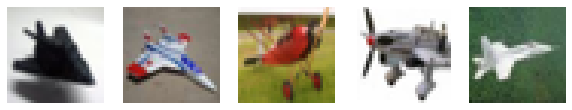

Label:  1


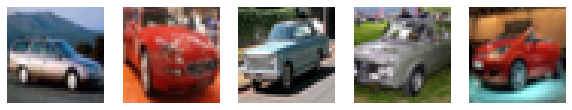

Label:  2


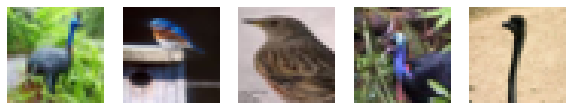

Label:  3


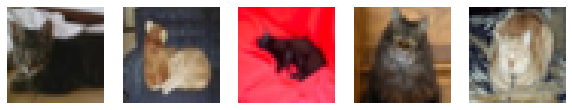

Label:  4


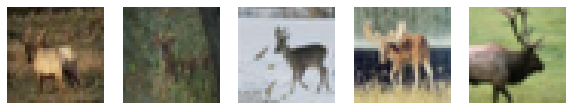

Label:  5


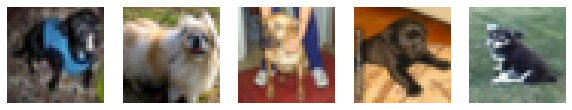

Label:  6


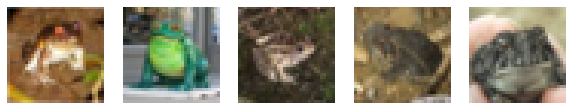

Label:  7


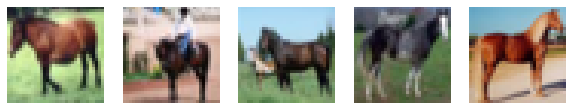

Label:  8


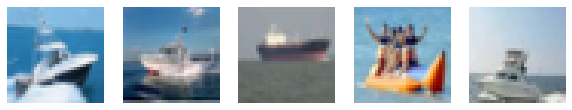

Label:  9


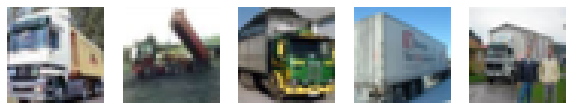

In [17]:
# render the 5 images for each key in the dictionary
for key in label_dict:
    plt.figure(figsize=(10,10))
    print("Label: ", key)
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(df_combined[label_dict[key][i]])
        plt.axis('off')
    plt.show()

### Decided to pick label 5 which is a dog

## Data Processing

In [18]:
# check how many values in the dataframe
df_labels.shape


(50000, 3)

In [19]:
# get the indexs of all the images with label 5
dog_index = []
for i in range(len(df_labels)):
    if df_labels['labels'][i] == 5:
        dog_index.append(i)

In [20]:
# create new empty dataframe
df_dog = pd.DataFrame()

In [21]:
# add the images with label 5 to the new dataframe
for i in dog_index:
    # use df_combined because it has the images in the correct format
    df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)


C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3206676837.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3206676837.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3206676837.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3206676837.py:4: FutureWarning: The

In [22]:
# check the shape of the new dataframe
df_dog.shape

(5000, 2)

In [23]:
df_dog.head()

image  labels
0  [[[45, 20, 19], [42, 21, 18], [35, 17, 13], [3...       5
1  [[[101, 114, 35], [94, 116, 48], [98, 112, 42]...       5
2  [[[213, 221, 221], [119, 127, 122], [58, 71, 8...       5
3  [[[141, 70, 8], [139, 61, 2], [136, 55, 0], [1...       5
4  [[[154, 179, 152], [159, 183, 157], [165, 189,...       5

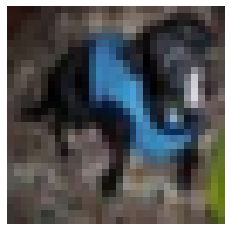

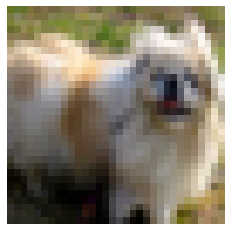

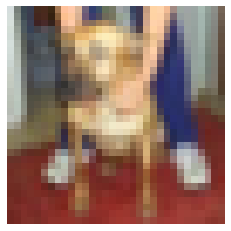

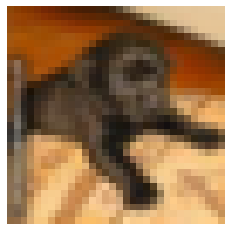

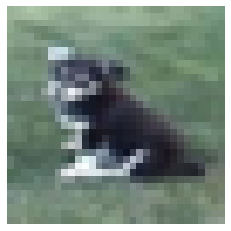

In [24]:
# render first 5 images from df_dog
for i in range(5):
    plt.imshow(df_dog['image'][i])
    plt.axis('off')
    plt.show()

In [25]:
# add 5000 more images to the df_dog dataframe from other labels
count = 0
for i in range(10000):
    # if i is from dog_index then skip it
    if i in dog_index:
        continue
    # if count is 5000 then break
    if count == 5000:
        break

    else:
        df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
        count += 1

C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3751234421.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3751234421.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3751234421.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3751234421.py:12: FutureWarning:

In [26]:
# check the shape of the new dataframe
df_dog.shape

(10000, 2)

In [27]:
# check label counts
df_dog['labels'].value_counts()

5    5000
6     580
8     570
9     568
2     568
4     567
0     559
7     540
3     540
1     508
Name: labels, dtype: int64

In [28]:
df_dog.tail()


image  labels
9995  [[[161, 150, 139], [167, 152, 135], [166, 152,...       2
9996  [[[66, 56, 57], [75, 64, 62], [88, 75, 71], [8...       9
9997  [[[170, 180, 189], [169, 179, 188], [169, 179,...       0
9998  [[[102, 101, 100], [103, 102, 101], [107, 106,...       3
9999  [[[92, 113, 137], [93, 114, 138], [92, 111, 13...       2

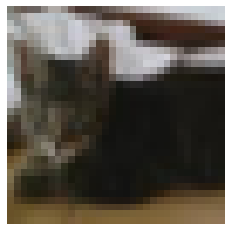

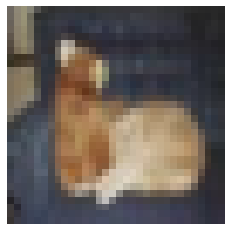

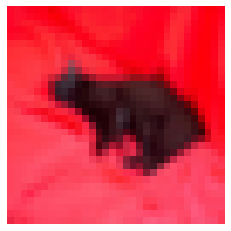

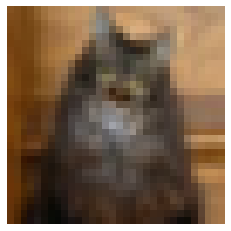

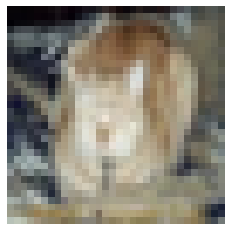

In [29]:
# loop through dataframe and render 5 images from label 3
count = 0
for i in df_dog.index:
    if count == 5:
        break
    if df_dog['labels'][i] == 3:
        plt.imshow(df_dog['image'][i])
        plt.axis('off')
        plt.show()
        count += 1

In [30]:
# make a new dataframe for the test data
df_test = pd.DataFrame()

In [31]:
# reshape test_df to 32x32x3
test_df = test_df.values.reshape(-1, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [32]:
# add 1000 images from test_df that have label 5 to df_test
count = 0
for i in range(len(test_batch[b'labels'])):
    if count == 1000:
        break
    if test_batch[b'labels'][i] == 5:
        df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
        count += 1


C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3112791081.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3112791081.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3112791081.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\3112791081.py:7: FutureWarning: The

In [33]:
test_df.shape

(10000, 32, 32, 3)

In [34]:
df_test.shape

(1000, 2)

In [35]:
# add 1000 images from test_df that do not have the label 5 to df_test
count = 0
for i in range(len(test_batch[b'labels'])):
    if count == 1000:
        break
    if test_batch[b'labels'][i] != 5:
        df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
        count += 1

C:\Users\2much\AppData\Local\Temp\ipykernel_14124\968956703.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\968956703.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\968956703.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
C:\Users\2much\AppData\Local\Temp\ipykernel_14124\968956703.py:7: FutureWarning: The fra

In [36]:
df_test.shape

(2000, 2)

In [37]:
# check label counts
df_test['labels'].value_counts()

5    1000
6     130
0     119
3     115
9     115
8     114
7     106
2     106
1      99
4      96
Name: labels, dtype: int64

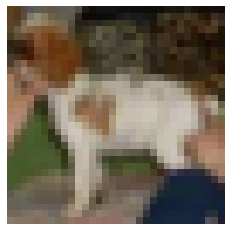

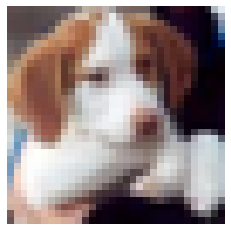

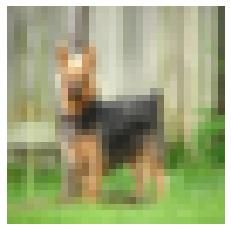

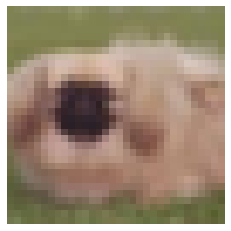

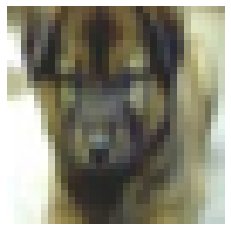

In [38]:
# render 5 images from label 5
count = 0
for i in df_test.index:
    if count == 5:
        break
    if df_test['labels'][i] == 5:
        plt.imshow(df_test['image'][i])
        plt.axis('off')
        plt.show()
        count += 1

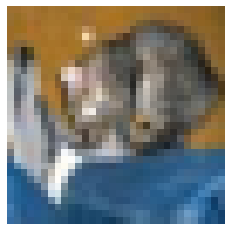

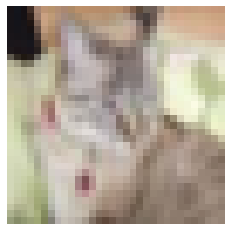

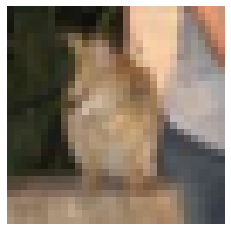

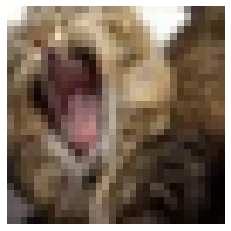

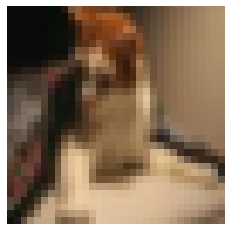

In [39]:
# render 5 images from label 3
count = 0
for i in df_test.index:
    if count == 5:
        break
    if df_test['labels'][i] == 3:
        plt.imshow(df_test['image'][i])
        plt.axis('off')
        plt.show()
        count += 1

## Data Modelling

In [40]:
# split the df_dog dataframe into x_train and y_train
x_train = df_dog['image']
y_train = df_dog['labels']

In [41]:
# split the df_test dataframe into X_test and y_test
X_test = df_test['image']
y_test = df_test['labels']

In [54]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

ModuleNotFoundError: No module named 'tensorflow.python.trackable'

In [48]:
def generateModel():
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(3,32,32))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    #Adding convolutional layers
    model.add(layers.Conv3D(64, 3, activation="relu"))
    model.add(layers.MaxPooling3D())
    model.add(layers.Conv3D(32, 3, activation="relu"))
    model.add(layers.MaxPooling3D())
    model.add(layers.Dense(128, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer=optimizers.SGD(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [51]:
model = generateModel()

log_dir = "output/logs/" + datetime.now().strftime("%Y-%m-%d-%H:%M:%S")

# Callbacks for QoL.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(x_train, y_train,
          validation_data=(X_test, y_test),
          epochs=50000,
          batch_size=1000, # Set this to a lower number if your computer spec is bad.
          callbacks=[tensorboard_callback, earlystop_callback],
          # verbose=0 # Uncomment this line to reduce the printing on console.
          )

ModuleNotFoundError: No module named 'tensorflow.python.trackable'

# Introduction

In [ ]:
print("hi")

# Model Process

# Model Performance

# Conclusion

# References

1. [Learning Multiple Layers of Features from Tiny Images](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.